# Práctica 1a: PLN con SpaCy - Mineria de Textos.

Importación de los paquetes necesarios.

In [1]:
import spacy
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()

Obtención del corpus desde GitHub.

In [3]:
!wget https://raw.githubusercontent.com/COST-ELTeC/ELTeC-eng/master/level1/ENG19191_Hamilton.xml

--2024-02-13 11:45:17--  https://raw.githubusercontent.com/COST-ELTeC/ELTeC-eng/master/level1/ENG19191_Hamilton.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376548 (368K) [text/plain]
Saving to: ‘ENG19191_Hamilton.xml.1’

ENG19191_Hamilton.x 100%[===================>] 367,72K  --.-KB/s    in 0,1s    

2024-02-13 11:45:17 (2,64 MB/s) - ‘ENG19191_Hamilton.xml.1’ saved [376548/376548]



Lectura del corpus y extracción de los párrafos mediante BeautifulSoup.

In [4]:
with open("ENG19191_Hamilton.xml", "r") as file:
    novela = file.read()

In [5]:
soup = BeautifulSoup(novela, "xml")

parrafos = soup.find_all("p")

In [6]:
documento = ""

for parrafo in parrafos:
    documento += parrafo.text + "\n"

In [7]:
print(documento)


WILLIAM
AN ENGLISHMAN
BY
CICELY HAMILTON
London 
SKEFFINGTON & SON, LTD. 
34 SOUTHAMPTON STREET, STRAND, W.C. 2. 
PUBLISHERS TO HIS MAJESTY THE KING
William Tully was a little over three-and-twenty when he emerged from the chrysalis stage of
     his clerkdom and became a Social Reformer. His life and doings until the age of twenty-three,
     had given small promise of the distinction of his future career; from a mild-mannered,
     pale-faced and under-sized boy he had developed into a mild-mannered, pale-faced little adult
     standing five foot five in his boots. Educated at a small private school in the suburbs of
     London, his record for conduct was practically spotless and he once took a prize for Divinity;
     further, to the surprise and relief of his preceptors, he managed to scrape through the Senior
     Cambridge Local Examination before he was transferred to a desk in the office of a London
     insurance company. His preceptor-in-chief, in a neatly-written certific

Análisis y obtención de un CSV con las columnas "palabra | lema | categoria_gramatical | tipo de dependencia sintáctica | palabra de quien depende " para cada token del corpus.

In [8]:
documento_nlp = nlp(documento)
df = pd.DataFrame(columns = ["Palabra", "Lema", "Categoría Gramatical", "Tipo de Dependencia", "Palabra de quien depende"])

In [9]:
import warnings
warnings.filterwarnings("ignore")

for token in documento_nlp:
    nueva_fila = {'Palabra': token.text,
                  'Lema': token.lemma_,
                  'Categoría Gramatical': token.pos_,
                  'Tipo de Dependencia': token.dep_,
                  'Palabra de quien depende': token.head.text}
    df = pd.concat([df, pd.DataFrame([nueva_fila])], ignore_index=True)


In [10]:
df

,Palabra,Lema,Categoría Gramatical,Tipo de Dependencia,Palabra de quien depende
0,\n,\n,SPACE,dep,WILLIAM
1,WILLIAM,WILLIAM,PROPN,nmod,SKEFFINGTON
2,\n,\n,SPACE,dep,WILLIAM
3,AN,an,PRON,punct,WILLIAM
4,ENGLISHMAN,ENGLISHMAN,PROPN,compound,BY
...,...,...,...,...,...
75505,for,for,ADP,prep,filed
75506,possible,possible,ADJ,amod,inquiries
75507,inquiries,inquiry,NOUN,pobj,for
75508,.,.,PUNCT,punct,took


In [11]:
df.to_csv("Resultados.csv")

Extracción de los 10 grupos nominales de dos o más palabras más frecuentes.

In [12]:
from collections import Counter

array_grup_nom = []

for grup_nom in documento_nlp.noun_chunks:
    array_grup_nom.append(grup_nom.text)

frecuencia_grup_nom = Counter(array_grup_nom)

# Grupos nominales con mas de dos palabras
frecuencia_grup_nom = dict(filter(lambda item: len(item[0].split()) >= 2, frecuencia_grup_nom.items()))

# Diccionario con los 10 grupos nominales mas frecuentes
frecuentes = dict(sorted(frecuencia_grup_nom.items(), key=lambda item: item[1], reverse=True)[:10])

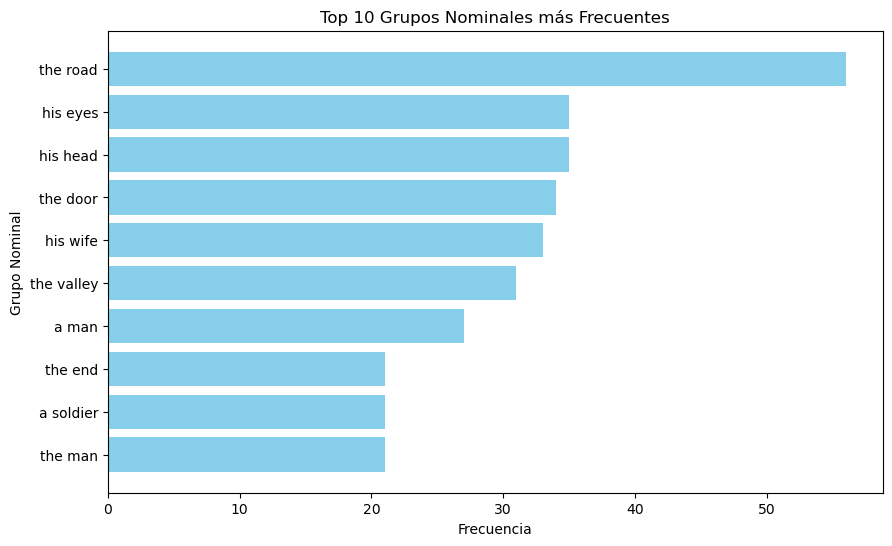

In [13]:
# Creación de grafico
plt.figure(figsize=(10, 6))
plt.barh(list(frecuentes.keys()), list(frecuentes.values()), color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Grupo Nominal')
plt.title('Top 10 Grupos Nominales más Frecuentes')
plt.gca().invert_yaxis()
plt.show()

Extracción de las 10 entidades nombradas más frecuentes.

In [14]:
entidades = []

for entidad in documento_nlp.ents:
    entidades.append(entidad.text)

frecuencia_entidades = Counter(entidades)

entidades_frecuentes = dict(sorted(frecuencia_entidades.items(), key=lambda item: item[1], reverse=True)[:10])


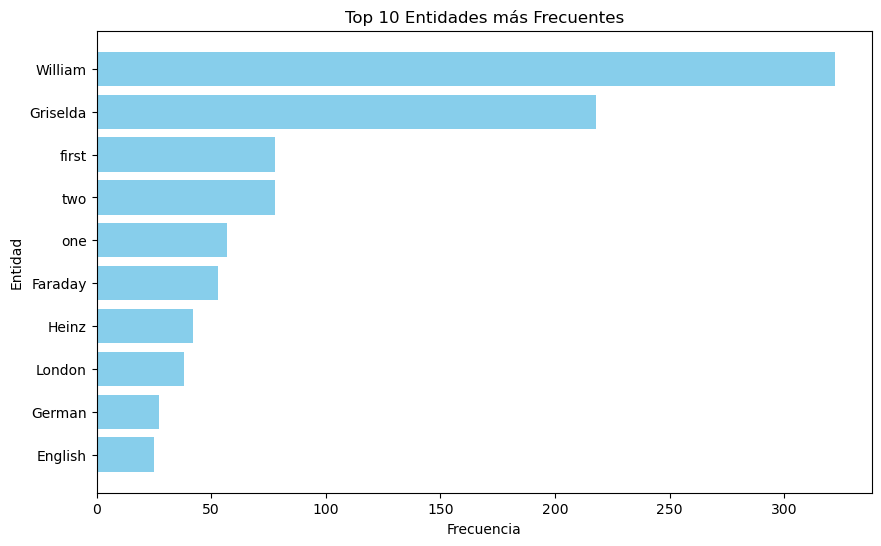

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(list(entidades_frecuentes.keys()), list(entidades_frecuentes.values()), color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Entidad')
plt.title('Top 10 Entidades más Frecuentes')
plt.gca().invert_yaxis()
plt.show()

Cantidad de nombres, adjetivos, verbos y adverbios presentes en el texto y creación de un gráfico de barras.

In [16]:
item_counts = df["Categoría Gramatical"].value_counts()
print(item_counts)

Categoría Gramatical
NOUN     11905
ADP       8590
PUNCT     8446
PRON      8294
VERB      8082
DET       6296
ADJ       4268
SPACE     4005
AUX       3698
ADV       3294
CCONJ     3292
PROPN     1788
SCONJ     1668
PART      1469
NUM        368
INTJ        44
X            3
Name: count, dtype: int64


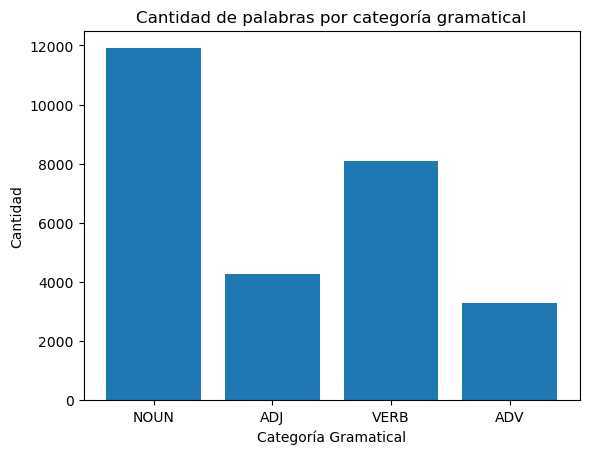

In [17]:
datos = item_counts.loc[['NOUN', 'ADJ', 'VERB', 'ADV']]

plt.bar(datos.index, datos.values)
plt.xlabel('Categoría Gramatical')
plt.ylabel('Cantidad')
plt.title('Cantidad de palabras por categoría gramatical')
plt.show()


### Ampliación 1

In [18]:
#!pip install spacy_conll
#!pip install spacy_stanza

Como el corpus es extenso, la generacion de este en formato CONLL requiere mucho tiempo de ejecución por lo que se hará de los primeros 10 párrafos.

In [19]:
documento_corto = ""

for i, parrafo in enumerate(parrafos):
    if i >= 10:
        break
    
    documento_corto += parrafo.text + "\n"

En el código mostrado a continuación se muestran los 10 primeros párrafos del corpus en formato CONLL.

In [20]:
from spacy_conll import init_parser

nlp = init_parser("en",
                  "stanza",
                  parser_opts={"use_gpu": True, "verbose": False},
                  include_headers=True)

doc = nlp(documento_corto)

documento_conll = doc._.conll_str
print(documento_conll)

# sent_id = 1
# text = 
WILLIAM
AN ENGLISHMAN
BY
CICELY HAMILTON
London 
SKEFFINGTON & SON, LTD. 

1	
	
	SPACE	_SP	_	1		_	SpaceAfter=No
2	WILLIAM	WILLIAM	PROPN	NNP	Number=Sing	0	root	_	SpaceAfter=No
3	
	
	SPACE	_SP	_	3		_	SpaceAfter=No
4	AN	a	DET	DT	Definite=Ind|PronType=Art	5	det	_	_
5	ENGLISHMAN	englishman	NOUN	NN	Number=Sing	2	appos	_	SpaceAfter=No
6	
	
	SPACE	_SP	_	6		_	SpaceAfter=No
7	BY	by	ADP	IN	_	9	case	_	SpaceAfter=No
8	
	
	SPACE	_SP	_	8		_	SpaceAfter=No
9	CICELY	CICELY	PROPN	NNP	Number=Sing	2	nmod	_	_
10	HAMILTON	HAMILTON	PROPN	NNP	Number=Sing	9	flat	_	SpaceAfter=No
11	
	
	SPACE	_SP	_	11		_	SpaceAfter=No
12	London	London	PROPN	NNP	Number=Sing	9	flat	_	_
13	
	
	SPACE	_SP	_	13		_	SpaceAfter=No
14	SKEFFINGTON	SKEFFINGTON	PROPN	NNP	Number=Sing	9	flat	_	_
15	&	&	CCONJ	CC	_	16	cc	_	_
16	SON	SON	NOUN	NN	Number=Sing	9	conj	_	SpaceAfter=No
17	,	,	PUNCT	,	_	18	punct	_	_
18	LTD	ltd	NOUN	NN	Number=Sing	9	appos	_	SpaceAfter=No
19	.	.	PUNCT	.	_	2	punct	_	_
20	
	
	SPACE	_SP	_	20		_	SpaceAft

Al observar la salida en formato CONLL se observa como las palabras plurales tienen el atributo "Number=Plur", por lo que lo la función del código mostrado a continuación es analizar cada linea del texto en formato CONLL, buscar "Number=Plur" y devolver la segunda palabra de cada linea (ya que la primera es el indice de la palabra en el parrafo). Seguidamente se imprimen las palabras en plural del texto.

In [21]:
plurales = []

for linea in documento_conll.split('\n'):
    if "Number=Plur" in linea:
        palabras = linea.split()
        plurales.append(palabras[1])

print(plurales)

['PUBLISHERS', 'doings', 'boots', 'suburbs', 'preceptors', 'employers', 'they', 'years', 'superiors', 'restrictions', 'they', 'placed', 'wishes', 'wishes']


A continuación se ha seguido la misma estrategia que en el apartado anterior, en este caso la caracteristica a buscar para obtener los verbos en pasado es "Tense=Past".

In [22]:
pasado = []

for linea in documento_conll.split('\n'):
    if "Tense=Past" in linea:
        palabras = linea.split()
        pasado.append(palabras[1])

print(pasado)

['was', 'emerged', 'became', 'had', 'given', 'faced', 'had', 'developed', 'faced', 'Educated', 'was', 'took', 'managed', 'was', 'transferred', 'written', 'assured', 'lived', 'given', 'had', 'brought', 'said', 'lived', 'did', 'disliked', 'placed', 'disliked', 'stiffened']


### Ampliación 2

El primer paso es la lematización del texto, en este caso al igual que en el apartado anterior, se utilizaran únicamente los primeros 10 párrafos del corpus.

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Extraccion de tokens
tokens = word_tokenize(documento_corto)

# Paso a minuscula y eliminacion de stopwords (palabras comunes que no aportan mucho significado)
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lematización
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens]
documento_lematizado = ' '.join([lemmatizer.lemmatize(word) for word in tokens])

print(documento_lematizado)

william englishman cicely hamilton london skeffington son southampton street strand publisher majesty king william tully little emerged chrysalis stage clerkdom became social reformer life doings age given small promise distinction future career boy developed little adult standing five foot five boot educated small private school suburb london record conduct practically spotless took prize divinity surprise relief preceptor managed scrape senior cambridge local examination transferred desk office london insurance company certificate assured future employer would find painstaking william first six year engagement lived character given mother masterful woman brought painstaking obedient might said truth long lived know otherwise true disliked office superior vaguely restriction placed upon reason vaguely disliked mother wish indeterminate ambition vague dislike never stiffened active resentment


Obtención de los synsets mas frecuentes.

In [24]:
# Obtención de los synsets
synsets = [nltk.corpus.wordnet.synsets(word) for word in lemmas]

# Obtencion de los nombres de los synsets
synset_nombres = [ss.name() for sublist in synsets for ss in sublist]

synset_frecuecia = Counter(synset_nombres)
synset_frecuentes = synset_frecuecia.most_common(5)

print(synset_frecuentes)

[('small.a.01', 4), ('little.s.03', 4), ('little.s.05', 4), ('little.s.07', 4), ('london.n.01', 3)]


En la celda anterior se muestran los 5 synsets mas frecuentes (de los primeros 10 párrafos del corpus). Estos resultados se han generado a partir del texto lematizado y los synsets según WordNet.
Como se observa cuatro de los cinco synsets mas frecuentes están asociados con la palabra "little", pero cada uno con una designación diferente. Tambien aparece la "london", repetida tres veces en el texto.
Esto indica, en caso de ser la clasificación correcta, que en el texto se describe o menciona de manera repetida objetos pequeños, ademas de transcurrirse los hechos (o las descripciones) en la ciudad de Londres.
Tras una breve lectura del inicio del corpus, confirmo que la clasificación obtenida es correcta, en el inicio del texto se describe la vida de William Tully, un joven que ha crecido y trabajado en Londres.